In [1]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

df_input = []
df_input2 = []
for amt_resil in range(6):
    for amt_shirking_fort in range(6):
        for amt_aversion in range(6):
            if amt_shirking_fort + amt_aversion == 0 or (amt_shirking_fort + amt_resil >= 5 and amt_shirking_fort + amt_aversion <= 6): # want combined 5-6 EA/SF or non sf/ea for resil data
                for i in range(100000):
                    temp_list = calc_rng_dmg.calc_dmg("light_fs_vicious_fire_damage",amt_resil_ui=amt_resil,amt_shirking_ui=amt_shirking_fort,amt_aversion_ui=amt_aversion)
                    temp_list.append(amt_resil)
                    temp_list.append(amt_shirking_fort)
                    temp_list.append(amt_aversion)
                    df_input.append(temp_list)

df = pd.DataFrame(df_input,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage","amt resil","amt shirking fort", "amt aversion"])

KeyboardInterrupt: 

### Meta Gear Analysis

In [ ]:
sf_df = df[(df['amt resil'] == 5) & (df['amt shirking fort'] == 5)]
ea_df = df[(df['amt resil'] == 5) & (df['amt aversion'] == 5)]
illegal_sf_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 5) & (df['amt aversion'] == 1)]
illegal_ea_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 1) & (df['amt aversion'] == 5)]

sf_df.sort_values(by='damage')

,damage,base damage,crit,crit damage modifier,empower %,dmg absorbed,rend percentage,amt resil,amt shirking fort,amt aversion
8079576,1254,1726,False,1.38,1.11,0.85,0.77,5,5,1
8055070,1270,1726,False,1.38,1.11,0.85,0.78,5,5,1
8058561,1282,1726,False,1.38,1.12,0.85,0.78,5,5,1
7995128,1290,1775,False,1.38,1.11,0.85,0.77,5,5,0
7964454,1290,1775,False,1.38,1.11,0.85,0.77,5,5,0
...,...,...,...,...,...,...,...,...,...,...
7925293,3598,2625,True,1.38,1.29,0.85,1.25,5,5,0
7988393,3598,2625,True,1.38,1.29,0.85,1.25,5,5,0
7911212,3608,2612,True,1.38,1.30,0.85,1.25,5,5,0
7951268,3613,2637,True,1.38,1.30,0.85,1.24,5,5,0


In [ ]:
print(f"sf mean: {sf_df['damage'].mean()} sf median: {sf_df['damage'].median()} standard deviation: {round(sf_df['damage'].std(),2)} max: {sf_df['damage'].max()}")
print(f"sf mean: {ea_df['damage'].mean()} sf median: {ea_df['damage'].median()} standard deviation: {round(ea_df['damage'].std(),2)} max: {ea_df['damage'].max()}")
print(f"sf mean: {illegal_sf_df['damage'].mean()} sf median: {illegal_sf_df['damage'].median()} standard deviation: {round(illegal_sf_df['damage'].std(),2)} max: {illegal_sf_df['damage'].max()}")
print(f"sf mean: {illegal_ea_df['damage'].mean()} sf median: {illegal_ea_df['damage'].median()} standard deviation: {round(illegal_ea_df['damage'].std(),2)} max: {illegal_ea_df['damage'].max()}")

sf mean: 2133.75492 sf median: 2092.0 standard deviation: 369.82 max: 3613
sf mean: 1997.22163 sf median: 1961.0 standard deviation: 355.98 max: 3305
sf mean: 2124.06006 sf median: 2080.0 standard deviation: 381.72 max: 3599
sf mean: 2002.81854 sf median: 1962.0 standard deviation: 370.05 max: 3332


[1.0684, 1.0, 1.0635, 1.0028]

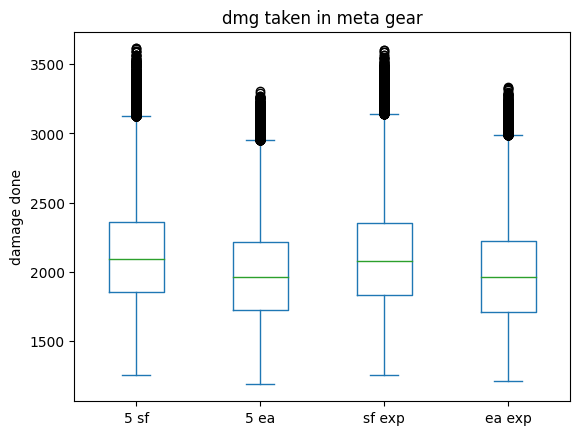

In [ ]:
# List of the DataFrames
dataframes_list = [sf_df, ea_df, illegal_sf_df, illegal_ea_df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
mean = [df['damage'].mean() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['5 sf','5 ea','sf exp','ea exp']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("dmg taken in meta gear")

base_resil_dmg = min(mean)
mean_dmg_percent = [round(x/base_resil_dmg,4) for x in mean]
mean_dmg_percent


### Resil Analysis

In [ ]:
r0df = df[(df['amt resil']==0) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r1df = df[(df['amt resil']==1) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r2df = df[(df['amt resil']==2) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r3df = df[(df['amt resil']==3) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r4df = df[(df['amt resil']==4) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r5df = df[(df['amt resil']==5) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]

In [ ]:
print(f"0 resil mean: {r0df['damage'].mean()} sf median: {r0df['damage'].median()} standard deviation: {round(r0df['damage'].std(),2)} max: {r0df['damage'].max()}")
print(f"1 resil mean: {r1df['damage'].mean()} sf median: {r1df['damage'].median()} standard deviation: {round(r1df['damage'].std(),2)} max: {r1df['damage'].max()}")
print(f"2 resil mean: {r2df['damage'].mean()} sf median: {r2df['damage'].median()} standard deviation: {round(r2df['damage'].std(),2)} max: {r2df['damage'].max()}")
print(f"3 resil mean: {r3df['damage'].mean()} sf median: {r3df['damage'].median()} standard deviation: {round(r3df['damage'].std(),2)} max: {r3df['damage'].max()}")
print(f"4 resil mean: {r4df['damage'].mean()} sf median: {r4df['damage'].median()} standard deviation: {round(r4df['damage'].std(),2)} max: {r4df['damage'].max()}")
print(f"5 resil mean: {r5df['damage'].mean()} sf median: {r5df['damage'].median()} standard deviation: {round(r5df['damage'].std(),2)} max: {r5df['damage'].max()}")


0 resil mean: 2359.95374 sf median: 2282.0 standard deviation: 492.64 max: 4040
1 resil mean: 2339.73958 sf median: 2276.0 standard deviation: 464.73 max: 3971
2 resil mean: 2319.94672 sf median: 2265.0 standard deviation: 442.35 max: 3884
3 resil mean: 2296.46917 sf median: 2250.0 standard deviation: 418.15 max: 3780
4 resil mean: 2279.28974 sf median: 2240.0 standard deviation: 396.65 max: 3695
5 resil mean: 2262.55431 sf median: 2225.0 standard deviation: 381.77 max: 3614


[1.0256, 1.0229, 1.018, 1.0112, 1.0067, 1.0]

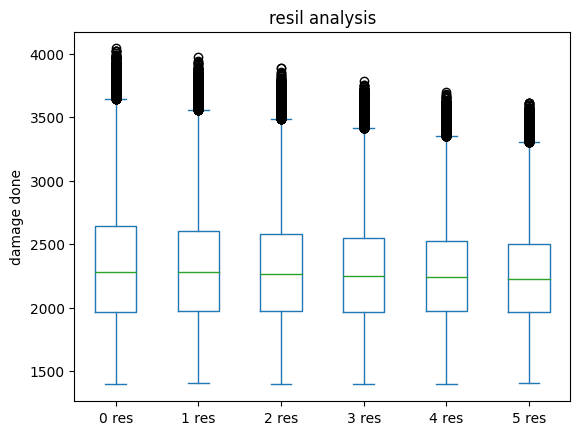

In [ ]:
# List of the DataFrames
dataframes_list = [r0df,r1df,r2df,r3df,r4df,r5df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['0 res','1 res','2 res','3 res','4 res','5 res']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("resil analysis")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

# r1df.sort_values(by='damage')

### attunement vs shirking analysis

In [ ]:
def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

shirk = get_class_data("med_bruiser_wh_shirk",100000)
attunement = get_class_data("med_bruiser_wh_attunement",100000)

df_shirk = pd.DataFrame(shirk,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_attunement = pd.DataFrame(attunement,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [ ]:
print(f"shirking mean: {df_shirk['damage'].mean()} sf median: {df_shirk['damage'].median()} standard deviation: {round(df_shirk['damage'].std(),2)} max: {df_shirk['damage'].max()}")
print(f"attunement mean: {df_attunement['damage'].mean()} sf median: {df_attunement['damage'].median()} standard deviation: {round(df_attunement['damage'].std(),2)} max: {df_attunement['damage'].max()}")

shirking mean: 2539.17086 sf median: 2505.0 standard deviation: 517.73 max: 4348
attunement mean: 2601.04261 sf median: 2584.0 standard deviation: 470.5 max: 3807


[1.0, 1.0315]

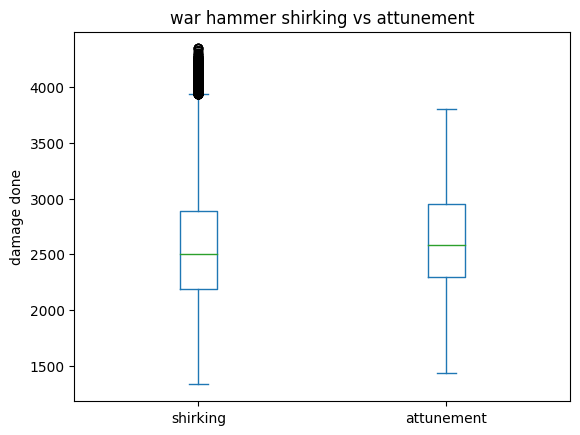

In [ ]:
# List of the DataFrames
dataframes_list = [df_shirk,df_attunement]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['shirking','attunement']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("war hammer shirking vs attunement")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

In [1]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd

def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

fd_ip = get_class_data("light_fs_vicious_fire_damage",100000)
keen_ip = get_class_data("light_fs_vicious_keen",100000)
keen_fd =  get_class_data("light_fs_vicious_keen_dmg",100000)

df_fdip = pd.DataFrame(fd_ip,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_keenip = pd.DataFrame(keen_ip,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_keenfd = pd.DataFrame(keen_fd,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [2]:
print(f"fire damage mean: {df_fdip['damage'].mean()} sf median: {df_fdip['damage'].median()} standard deviation: {round(df_fdip['damage'].std(),2)} max: {df_fdip['damage'].max()}")
print(f"invig punishment mean: {df_keenip['damage'].mean()} sf median: {df_keenip['damage'].median()} standard deviation: {round(df_keenip['damage'].std(),2)} max: {df_keenip['damage'].max()}")
print(f"invig punishment mean: {df_keenfd['damage'].mean()} sf median: {df_keenfd['damage'].median()} standard deviation: {round(df_keenfd['damage'].std(),2)} max: {df_keenfd['damage'].max()}")

fire damage mean: 2074.33691 sf median: 2031.0 standard deviation: 385.41 max: 3608
invig punishment mean: 2035.02957 sf median: 1997.0 standard deviation: 385.92 max: 3474
invig punishment mean: 1944.70019 sf median: 1906.0 standard deviation: 371.14 max: 3237


[1.0656, 1.0477, 1.0]

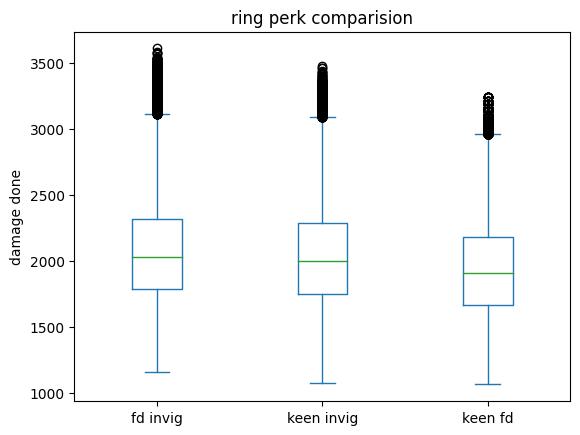

In [3]:
# List of the DataFrames
dataframes_list = [df_fdip,df_keenip,df_keenfd]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['fd invig','keen invig','keen fd']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("ring perk comparision")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent